## Unsupervised Learning
## Project: Creating Customer Segments

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

In [34]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print("Wholesale customers dataset has {} samples with {} features each.".format(*data.shape))
except:
    print("Dataset could not be loaded. Is the dataset missing?")

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, we will begin exploring the data through visualizations and code to understand how each feature is related to the others. We will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which we will track through the course of this project.

In [35]:
# Display a description of the dataset
display(data.describe())

Fresh          Milk       Grocery        Frozen  \
count     440.000000    440.000000    440.000000    440.000000   
mean    12000.297727   5796.265909   7951.277273   3071.931818   
std     12647.328865   7380.377175   9503.162829   4854.673333   
min         3.000000     55.000000      3.000000     25.000000   
25%      3127.750000   1533.000000   2153.000000    742.250000   
50%      8504.000000   3627.000000   4755.500000   1526.000000   
75%     16933.750000   7190.250000  10655.750000   3554.250000   
max    112151.000000  73498.000000  92780.000000  60869.000000   

       Detergents_Paper  Delicatessen  
count        440.000000    440.000000  
mean        2881.493182   1524.870455  
std         4767.854448   2820.105937  
min            3.000000      3.000000  
25%          256.750000    408.250000  
50%          816.500000    965.500000  
75%         3922.000000   1820.250000  
max        40827.000000  47943.000000

### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, we will add **three** indices of our choice to the `indices` list which will represent the customers to track.

In [36]:
# Select three indices of your choice you wish to sample from the dataset
indices = [15,50,103]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print("Chosen samples of wholesale customers dataset:")
display(samples)

Chosen samples of wholesale customers dataset:


Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  10253  1114     3821     397               964           412
1   6269  1095     1980    3860               609          2162
2  56082  3504     8906   18028              1480          2498

Let's consider the total purchase cost of each product category and the statistical description of the dataset above for our sample customers.  We have to answer these questions:

* What kind of establishment (customer) could each of the three samples we've chosen represent?

    Reference mean values are as follows:

    * Fresh: 12000.2977
    * Milk: 5796.2
    * Grocery: 3071.9
    * Frozen: 3071.93
    * Detergents_paper: 2881.4
    * Delicatessen: 1524.8

- Knowing this, how do our samples compare? Does that help in driving our insight into what kind of establishments they might be? 


* The first chosen customer seems to be just ordinary retail food market, since the values are around mean.
* The second customer seems to be a small customer which is focusing on long-term storage of products (low amount of fresh food and relatively high amount of frozen food bought), so it is likely to be some distant shop with low turnover of goods, for instance, petrol station, small village store, etc. It could also be just a facility serving low quality food, cooking food from frozen products.
* The third customer seems to be wholesale retailer of food or a chain of restaurants or hotels, since it sells most of stuff in quantities which are way above mean (except Detergents_paper).

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

# Make a copy of the DataFrame, using the 'drop' function to drop the given feature
new_data = data.drop(['Grocery'], axis = 1)

# Split the data into training and testing sets(0.25) using the given feature as the target
# Set a random state.
X_train, X_test, y_train, y_test = train_test_split(new_data, data.Grocery, test_size=0.25, random_state=42)

# Create a decision tree regressor and fit it to the training set
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train, y_train)

# Report the score of the prediction using the testing set
score = regressor.score(X_test, y_test)
print(score)

0.681884008544


The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data. If you get a low score for a particular feature, that lends us to beleive that that feature point is hard to predict using the other features, thereby making it an important feature to consider when considering relevance.

Now let's answer these questions: 

* What was the reported prediction score of the predicted feature? 
* Is this feature necessary for identifying customers' spending habits?

We attempted to predict the 'Grocery' feature. The reported prediction score R^2 was 0.68188. This feature is not distinct and does not help to distinguish the type of customer. However, at least to some extent this feature can be used to identify customer's spending habits, since a customer buying more Grocery type of products is more likely to be a food market than caffe or restaurant. Food markets should buy more products of other types as well. Large orders may indicate that the customer is wholesaler.  Although we can guess the trends or specifics of the customer, we cannot imply it's specific type.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. 

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  


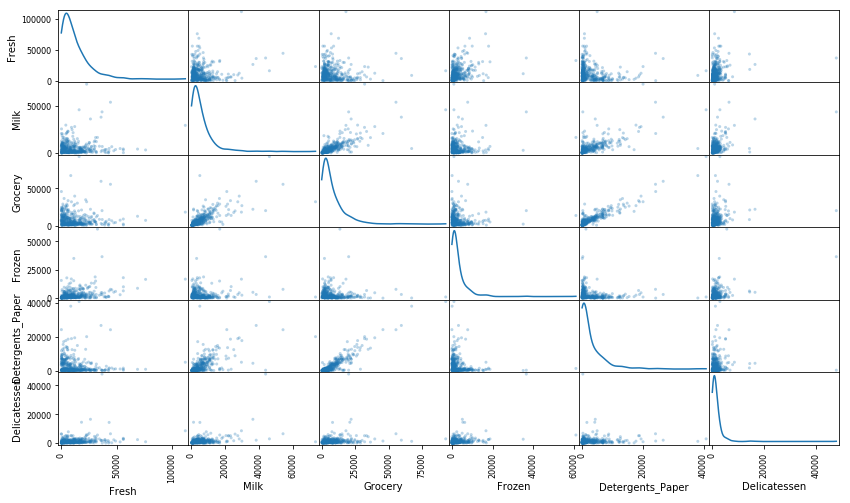

In [38]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

* Using the scatter matrix as a reference, let's discuss the distribution of the dataset, i.e. the normality, outliers, large number of data points near 0 among others.
* Are there any pairs of features which exhibit some degree of correlation? 
* Does this confirm or deny our suspicions about the relevance of the feature you attempted to predict? 
* How is the data for those features distributed?

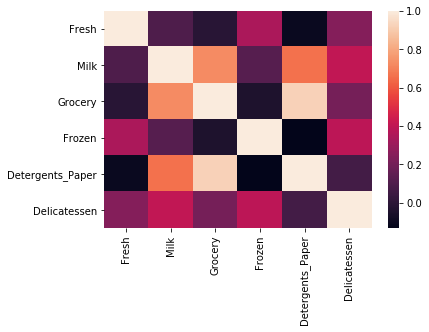

In [39]:
from seaborn import heatmap
heatmap(data.corr())

In [40]:
import matplotlib.pyplot as plt

## Grocery vs. Milk

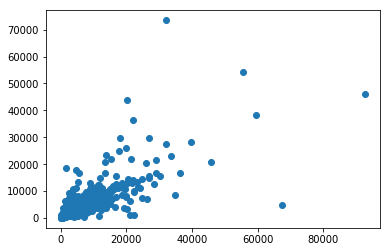

In [41]:
plt.scatter(data.Grocery, data.Milk)
plt.show()

## Grocery vs. Detergents_Paper

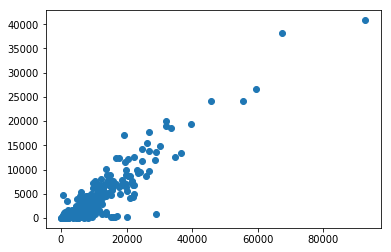

In [42]:
plt.scatter(data.Grocery, data.Detergents_Paper)
plt.show()

## Milk vs. Detergents_Paper

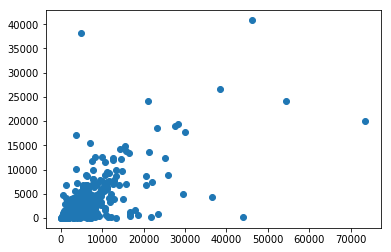

In [43]:
plt.scatter(data.Milk, data.Detergents_Paper)
plt.show()

**Answer:** 
* The distribution among the features in most cases is not normal. Furthermore, in most cases we can see a large number of data points near 0. There surely are outliers from here to there, but most numbers are in the lower end of the interval. In other words, the distributions are positively skewed.
* Exceptions may be the scatter plots of Grocery & Milk and Grocery & Detergents_Paper which are less skewed and look more similar to normal distribution. However, they still do not seem to be normally distributed.
* Looking at the scatter plots, the main pairs of features which exhibit at least some correlation are Grocery & Detergents_paper, Grocery & Milk, Milk & Detergents_Paper. We can see the same in the individual scatter plots and the heatmap of correlations, since in the mentioned pairs the correlation is higher, the colors are brighter. 
* We expected that purchases of Grocery type of products would correlate with other products and this was correct.
* As mentioned above, the Grocery data points correlate with Milk, Detergents_Paper and a little bit with Delicatessen, however its orders do not correlate with Fresh and Frozen.

## Data Preprocessing
In this section, we will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results we obtain from our analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  


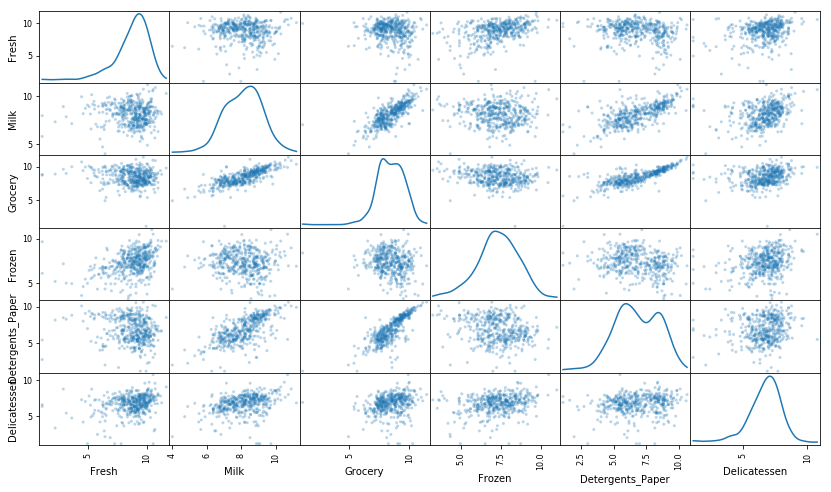

In [44]:
# Scale the data using the natural logarithm
log_data = np.log(data)

# Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features we may have identified earlier as being correlated, let's observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

In [45]:
# Display the log-transformed sample data
display(log_samples)

Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen
0   9.235326  7.015712  8.248267  5.983936          6.871091      6.021023
1   8.743372  6.998510  7.590852  8.258422          6.411818      7.678789
2  10.934570  8.161660  9.094480  9.799681          7.299797      7.823246

# Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In [85]:
from collections import Counter
outlier_data = Counter()
# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature],25)
    
    # Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature],75)
    
    # Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5 * (Q3 - Q1)
    
    # Display the outliers
    print("Data points considered outliers for the feature '{}':".format(feature))
    data_points = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    display(data_points)
    
    for i in range(len(data_points.index.values)):
        outlier_data[data_points.index[i]] += 1

print("Multi-feature data points:")
print([(key) for (key, value) in outlier_data.items() if value > 1], sep=",")
        
# Select the indices for data points you wish to remove
outliers  = [38,57,65,66,75,81,86,95,96,98,109,128,137,142,145,154,161,171,175,183,184,187,193,203,218,233,264,285,289,304,305,325,338,343,353,355,356,357,412,420,429,439]

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'Fresh':


Fresh       Milk    Grocery    Frozen  Detergents_Paper  Delicatessen
65   4.442651   9.950323  10.732651  3.583519         10.095388      7.260523
66   2.197225   7.335634   8.911530  5.164786          8.151333      3.295837
81   5.389072   9.163249   9.575192  5.645447          8.964184      5.049856
95   1.098612   7.979339   8.740657  6.086775          5.407172      6.563856
96   3.135494   7.869402   9.001839  4.976734          8.262043      5.379897
128  4.941642   9.087834   8.248791  4.955827          6.967909      1.098612
171  5.298317  10.160530   9.894245  6.478510          9.079434      8.740337
193  5.192957   8.156223   9.917982  6.865891          8.633731      6.501290
218  2.890372   8.923191   9.629380  7.158514          8.475746      8.759669
304  5.081404   8.917311  10.117510  6.424869          9.374413      7.787382
305  5.493061   9.468001   9.088399  6.683361          8.271037      5.351858
338  1.098612   5.808142   8.856661  9.655090          2.708050      6.309918
353  4.762174   8.742574   9.961898  5.429346          9.069007      7.013016
355  5.247024   6.588926   7.606885  5.501258          5.214936      4.844187
357  3.610918   7.150701  10.011086  4.919981          8.816853      4.700480
412  4.574711   8.190077   9.425452  4.584967          7.996317      4.127134

Data points considered outliers for the feature 'Milk':


Fresh       Milk    Grocery    Frozen  Detergents_Paper  Delicatessen
86   10.039983  11.205013  10.377047  6.894670          9.906981      6.805723
98    6.220590   4.718499   6.656727  6.796824          4.025352      4.882802
154   6.432940   4.007333   4.919981  4.317488          1.945910      2.079442
356  10.029503   4.897840   5.384495  8.057377          2.197225      6.306275

Data points considered outliers for the feature 'Grocery':


Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen
75   9.923192  7.036148  1.098612  8.390949          1.098612      6.882437
154  6.432940  4.007333  4.919981  4.317488          1.945910      2.079442

Data points considered outliers for the feature 'Frozen':


Fresh      Milk    Grocery     Frozen  Detergents_Paper  Delicatessen
38    8.431853  9.663261   9.723703   3.496508          8.847360      6.070738
57    8.597297  9.203618   9.257892   3.637586          8.932213      7.156177
65    4.442651  9.950323  10.732651   3.583519         10.095388      7.260523
145  10.000569  9.034080  10.457143   3.737670          9.440738      8.396155
175   7.759187  8.967632   9.382106   3.951244          8.341887      7.436617
264   6.978214  9.177714   9.645041   4.110874          8.696176      7.142827
325  10.395650  9.728181   9.519735  11.016479          7.148346      8.632128
420   8.402007  8.569026   9.490015   3.218876          8.827321      7.239215
429   9.060331  7.467371   8.183118   3.850148          4.430817      7.824446
439   7.932721  7.437206   7.828038   4.174387          6.167516      3.951244

Data points considered outliers for the feature 'Detergents_Paper':


Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen
75   9.923192  7.036148  1.098612  8.390949          1.098612      6.882437
161  9.428190  6.291569  5.645447  6.995766          1.098612      7.711101

Data points considered outliers for the feature 'Delicatessen':


Fresh       Milk    Grocery     Frozen  Detergents_Paper  \
66    2.197225   7.335634   8.911530   5.164786          8.151333   
109   7.248504   9.724899  10.274568   6.511745          6.728629   
128   4.941642   9.087834   8.248791   4.955827          6.967909   
137   8.034955   8.997147   9.021840   6.493754          6.580639   
142  10.519646   8.875147   9.018332   8.004700          2.995732   
154   6.432940   4.007333   4.919981   4.317488          1.945910   
183  10.514529  10.690808   9.911952  10.505999          5.476464   
184   5.789960   6.822197   8.457443   4.304065          5.811141   
187   7.798933   8.987447   9.192075   8.743372          8.148735   
203   6.368187   6.529419   7.703459   6.150603          6.860664   
233   6.871091   8.513988   8.106515   6.842683          6.013715   
285  10.602965   6.461468   8.188689   6.948897          6.077642   
289  10.663966   5.655992   6.154858   7.235619          3.465736   
343   7.431892   8.848509  10.177932   7.283448          9.646593   

     Delicatessen  
66       3.295837  
109      1.098612  
128      1.098612  
137      3.583519  
142      1.098612  
154      2.079442  
183     10.777768  
184      2.397895  
187      1.098612  
203      2.890372  
233      1.945910  
285      2.890372  
289      3.091042  
343      3.610918

Multi-feature data points:
[65, 66, 128, 154, 75]


Let's answer these questions: 

* Are there any data points considered outliers for more than one feature based on the definition above? 
* Should these data points be removed from the dataset? 
* Why the data points were added to the `outliers` list to be removed?

There are multiple data points considered to be outliers for more than one feature. The multi-feature data points are: 65, 66, 128, 154, 75. However, we chose to remove all of them in order to get more accurate model. This is because we will be using PCA which is sensitive to outliers. Furthermore, outliers in PCA could alter the results, since more explained variance (larger eigenvalue) could be estimated in a different vector which otherwise would not be so relevant. Furthermore, it would be harder to group the data points into specific clusters for clustering algorithms, because outliers may force overlapping between different types of customers and/or make the clusters less useful. We remove only 42 data points, so there is still plenty of data points left from 440 samples.

## Feature Transformation
In this section we will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

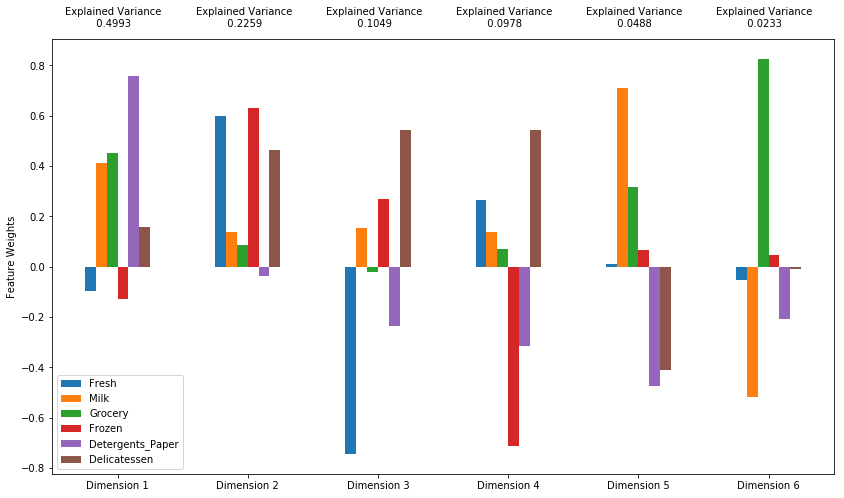

In [88]:
from sklearn.decomposition import PCA
# Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components=6)
pca.fit(good_data)

# Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

Let's answer these questions:

* How much variance in the data is explained* **in total** *by the first and second principal component? 
* How much variance in the data is explained by the first four principal components? 
* Using the visualization provided above, talk about each dimension and the cumulative variance explained by each, stressing upon which features are well represented by each dimension(both in terms of positive and negative variance explained). 

**Answer:** 

* In total 72.52% of variance is explained by the first and second principal components. 
* In total 92.79% of variance is explained by the first four principal components.

Dimensions:
1. The first dimension (49.93% explained variance) mainly represents features of Milk, Grocery, Detergents_Paper. Most of the variance is represented by Detergents_Paper feature. Delicatessen, Frozen and Fresh features account just for small amount of variance. 
2. The second dimension (22.59% explained variance) represents mainly these features:Fresh, Frozen and Delicatessen and to a much lesser extent Milk and Grocery and Detergents_Paper
3. The third dimension (10.49% explained variance) represents mainly these features: Fresh, Frozen, Detergents_Paper and Delicatessen. Milk and Grocery features do not play big role in explaining the variance of this component.
3. The fourth dimension (9.78% explained variance) represents mainly these features: Frozen, Detergents_Paper, Fresh and Delicatessen. Milk, Grocery do not play a big role in explaining the variance of this component. 

The first four dimensions may best represent most common types of customers. 
* For instance, first component may help us distinguish typical average size retailer which mainly sells milk, groceries, detergents, paper, etc. 
* It is hard to tell, but we may guess that the second component may help us distinguish some kind of restaurant which cooks food.
* The third component may be holding information about a typical cofee shop - buying delicatessen, milk and some frozen food, but having no Fresh goods, no Detergents_Paper type of goods. 
* The fourth component's type of customer is hard to guess, but it may be storing feature and data set of a small specialized retailer with fancy deserts and some food for sale. 

### Observation
Let's now see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Let's observe the numerical value for the first four dimensions of the sample points. We also have to consider if this is consistent with our initial interpretation of the sample points.

In [91]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

Dimension 1  Dimension 2  Dimension 3  Dimension 4  Dimension 5  \
0      -0.4351      -1.2598      -1.2207       0.4961      -0.6487   
1      -1.0691       0.6047       0.7706      -0.2588      -1.1878   
2       0.3731       3.2130      -0.4321      -0.7088      -0.2386   

   Dimension 6  
0       0.3370  
1       0.0163  
2       0.4246

### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a significant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In [92]:
# Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2)
pca.fit(good_data)

# Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Let's now see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions.

In [93]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

Dimension 1  Dimension 2
0      -0.4351      -1.2598
1      -1.0691       0.6047
2       0.3731       3.2130

## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

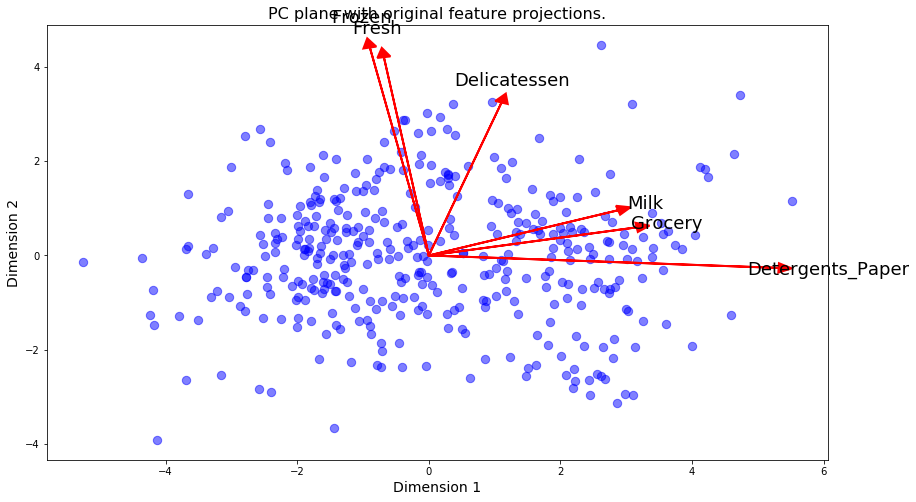

In [94]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier? 
The important features for first two dimensions observed earlier agree with the observations in the scatterplot.

## Clustering

In this section, we will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. We will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

Let's answer these questions: 

* What are the advantages to using a K-Means clustering algorithm? 
* What are the advantages to using a Gaussian Mixture Model clustering algorithm? 
* Given our observations about the wholesale customer data so far, which of the two algorithms will we use and why?

* Advantages of K-means clustering algorithm:
    * Scalable - large number of samples, medium number of clusters.
    * Has been used in many different industries.
    * The metric used is various distances between points.
    
* Advantages of Gaussian Mixture Model clustering algorithm:
    * Alghough generally the GMM is not scalable, it is the fastest algorithm for learning mixture models.
    * Agnostic:	As this algorithm maximizes only the likelihood, it will not bias the means towards zero, or bias the cluster sizes to have specific structures that might or might not apply.
    * The metric used is Mahalanobis distance which is a measure of distance from point P and distribution D. 
    
* Since there is a small amount of samples and no need for big number of clusters, we would say GMM is more appropriate here, since the Mahalanobis distance is more suitable for catching quite ambiguous clusters. In other words, soft clustering is more appropriate here given the fact that the data points include multiple projected features.
    
References:
* http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
* http://scikit-learn.org/stable/modules/mixture.html
* https://en.wikipedia.org/wiki/Mahalanobis_distance

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In [98]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
# Apply your clustering algorithm of choice to the reduced data 
clusterer = GaussianMixture(n_components=2, random_state=42)
clusterer.fit(reduced_data)

# Predict the cluster for each data point
preds = clusterer.predict(reduced_data)

# Find the cluster centers
centers = clusterer.means_

# Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)

# Calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(reduced_data, preds)
print(score)

0.447411995571


Let's explore the silhouette scores for several cluster numbers we tried and choose the number of clusters that has the best silhouette score.

* 2 clusters: 0.44741 - best silhouette score.
* 3 clusters: 0.36119
* 4 clusters: 0.30108
* 5 clusters: 0.31306
* 6 clusters: 0.31676
* 50 clusters: 0.26300
* 150 clusters: 0.3511

### Cluster Visualization
As we've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, we can now visualize the results by executing the code block below.

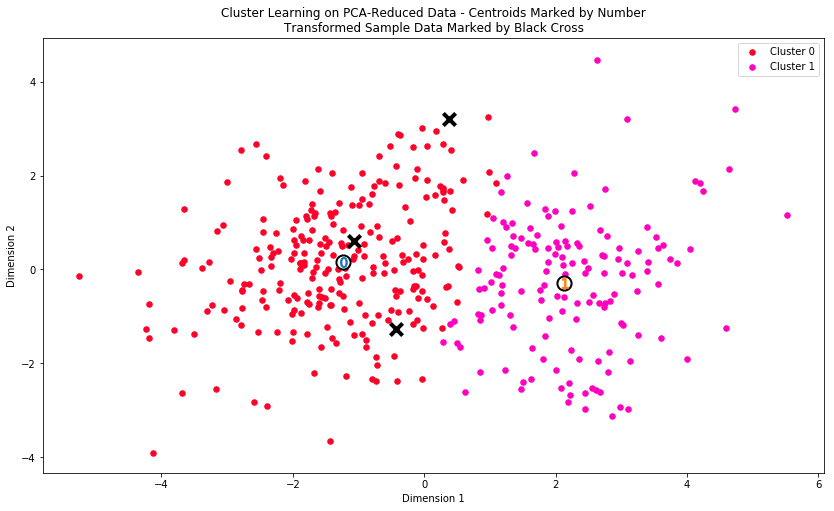

In [99]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In [100]:
# Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

Fresh    Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
Segment 0  9468.0  2067.0   2624.0  2196.0             343.0         799.0
Segment 1  5174.0  7776.0  11581.0  1068.0            4536.0        1101.0

Let's consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project(specifically looking at the mean values for the various feature points). What set of establishments could each of the customer segments represent?

* The customer segment 0 may be representing some kind of restaurant or larger coffee shop serving food, since there is a lot of Fresh type of good (although below mean) bought in higher amounts than in the other segment. Besides, the Frozen type of good is bought in higher amounts (Again below mean) than in the other segment as well, again hinting that it may be some kind of food serving facility. 
* The customer segment 1 may be repreresenting some kind of retailer. This segment may include medium retailers as well as wholesalers. The Detergents_Paper and Grocery types of good is bought in large amounts, way above mean. Milk is also bought in higher amounts, hinting that this segment main contain many retailers. 

* For each sample point, which customer segment best represents it? 
* Are the predictions for each sample point consistent with this?

In [102]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print("Sample point", i, "predicted to be in Cluster", pred)

Sample point 0 predicted to be in Cluster 0
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 0


1. Our prediction for the first customer (first sample point) does not agree with the prediction of the algorithm. We predicted that it would be just an average food retailer, since the values are around mean, however it was assigned to cluster 0 which I consider to be a cluster of food-serving facilities. 
2.  Our prediction on the second customer (second sample point) agrees with the prediction of clustering algorithm. I predicted that it is likely a small distant shop with low turnover of goods (petrol station, small village store) focusing on long-term storage of products (low amount of fresh food and relatively high amount of frozen food bought). Or a facility serving low quality of food, cooking food from frozen products. The algorithm assigned it to cluster 0 which we consider to be a cluster of food-serving facilities.
3. Our prediction towards the third customer (third sample point) agrees with the prediction of clustering algorithm, since it sells most of the stuff in quantities which are way above mean (except Detergents_Paper), so we predicted it to be a wholesale retailer or a chain of restaurants/hotels. And cluster 0 represents food-serving facilities. 

## Conclusion

In this final section, we will investigate ways that we can make use of the clustered data. First, we will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, we will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, we will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. 

* How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?

* We cannot assume that the change will affect all customers equally. The change will affect more of those customers who buy goods in smaller quantities, more frequently, need the goods to be available at a specific time. For instance, restaurants need more frequent deliveries of Fresh type of goods. Another example could be coffee shops who need frequent resupply of Milk and Delicatessen type of goods. On the other hand, retailers may need less frequent deliveries. 
* We can take customers from different clusters and make A/B tests on these two clusters. That means, we need to perform two A/B tests. A test group and a control group needs to be formed for each cluster. The groups need to be similar in terms of feature values. We need to perform the A/B test for samples as small as possible in order not to do harm to the business. However, in order to get a significance level of p < 0.05 which means that 1/20 of the tests may be a false positive, we could have 20 customers in testing group and 20 customers in the control group. Then we perform the change in delivery scheme for the test group and compare the response of the test group to the data of the control group. 

Reference:
http://stats.stackexchange.com/questions/192752/clustering-and-a-b-testing


### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
* How can the wholesale distributor label the new customers using only their estimated product spending and the **customer segment** data?

We could use some kind of supervised training algorithm such as SVM. The target variable could be customer segment generated by the GMM. 

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Let's run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, we will find the sample points are circled in the plot, which will identify their labeling.

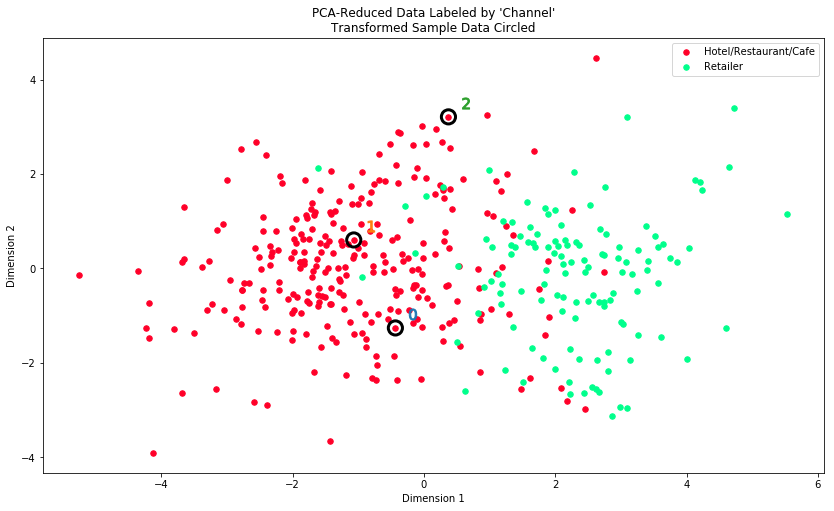

In [104]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

Let's answer these final questions

* How well does the clustering algorithm and number of clusters we've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? 
* Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? 
* Would we consider these classifications as consistent with our previous definition of the customer segments?

* Although the clustering algorithm, number of clusters we have chosen do not perfectly distinguish between Hotel/Restaurant/Cafe and Retailer customer, it nevertheless does pretty good job. 
* This distribution is a little big ambiguous and it is hardly possible that clusters with such high variance would be pure Retailers or Hotels/Restaurants/Cafes. 
* The classifications are similar, but not perfectly consistent with my previous definition of customer segments, since I predicted that segments represent retailers and a food serving facility. While this classification is more specific, one segment is considered to be 'Retailers' and the other - 'Hotels/Restaurants/Cafes'.